<a href="https://colab.research.google.com/github/Erike-Simon/CESAR-AED/blob/main/RNA_YOLO_V8_ANIMALS_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final - RNA e Deep Learning

**Alunos:** Erike Simon e José Aparecido

O objetivo desse projeto final é a aplicação dos conhecimentos adquiridos durante o curso para desenvolver um modelo customizado que realize a classificação de imagens ou a detecção de objetos em imagens.

Para esse projeto é necessário o uso de um dataset (conjunto de dados) criado pelo aluno. Esse dataset já foi criado em uma atividade anterior. Recomenda-se a utilização da ferramenta Roboflow para a criação e marcação do dataset.


Para o desenvolvimento do projeto, você deve:
*   Escolher se quer fazer uma classificação de imagens ou detecção de objetos
em imagens.
*   A partir dessa decisão, você deve escolher um modelo apropriado (durante as aulas eu apresentei YOLOv5 e MobileNetv2, mas você é livre e incentivado a usar outro modelo).
*   A partir da escolha do modelo, você deve então criar um Jupyter Notebook para realizar o treinamento. Esse notebook deve ser salvo e submetido nessa atividade (falarei mais sobre isso abaixo).
*   Feito o treinamento, vocês precisam submeter as métricas de treinamento (pelo menos Acurácia/Precisão). Se usar Weights&Bias (https://wandb.ai/), anexar os dados de lá, caso contrário, colocar prints de análise manual.

(Bônus)
*   Como atividade Bônus, você deve publicar o projeto no HuggingFace (huggingface.co), estando esse modelo disponível para ser testado.


**Submissão do Projeto**

Para entrega desse projeto, você deve criar um repositório no GitHub (github.com). Esse repositório deve conter:

*   Uma pasta chamada "dataset" contendo as imagens utilizadas no treinamento
*   Uma pasta chamada "models" contendo o snapshot do modelo (seja o modelo exportado, seja os pesos da melhor época)
*   Um arquivo Jupyter Notebook contendo todo o código de treinamento e mantendo as saídas (outputs) dos blocos
*   Uma pasta chamada "assets" que deve conter quaisquer outras imagens ou arquivos necessários
*  Um arquivo "README.md". Esse arquivo deve conter diversas informações sobre o projeto. Anexo a essa atividade está disponível um modelo a ser preenchido.
*  A entrega do projeto deve conter somente o link do repositório do GitHub!

**Cálculo da Nota**

O cálculo da nota desse projeto é feito a partir da soma dos seguintes critérios (com limite 10):
*   3 pontos: Jupyter Notebook (com uma tentativa de treinamento)
*   5 pontos: Modelo treinado com ao menos 50% de acurácia/precisão
*   2 pontos: Modelo treinado com 80% ou mais de acurácia/precisão
*   2 pontos: Modelo publicado no HuggingFace

Você deve perceber que a somatória dos pontos atinge 12 pontos, isso é proposital: dessa forma, você pode falhar em algum critério e compensar com outro. Perceba que a atividade bônus de publicação do projeto no HugginFace pode lhe dar 2 pontos!

Assim, a nota máxima será a somatória dos pontos, com limite 10.

**Deadline**

O período para a conclusão desse projeto é de 1 semana a partir da finalização das aulas.

Dúvidas: vc@cesar.school ou vc@cesar.org.br

Link para atividade no Classroom: https://classroom.google.com/c/NjAxNDI1OTYwNTA0/a/NTkwMjExOTYyMzAw/details

# Configurações iniciais

## Baixando as dependências

### Configurando acesso ao Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/My Drive/Colab Notebooks/CESAR/rna-deep-learning/Projeto-Classificação'

### Configurando ambiente

In [ ]:
# Verifica se está executando no ambiente correto. Deve executar utilizando GPU

!nvidia-smi

Thu Oct 19 18:52:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Define variável  HOME

In [ ]:
import os

HOME = os.getcwd()
print(HOME)

/content


### Configurando o RoboFlow e faz download do dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="E0rlyzmoGDea1UyBaAUf")
project = rf.workspace("cesar-school-recife").project("new-animals-classification")
dataset = project.version(1).download("folder")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not in


Extracting Dataset Version Zip to New-Animals-Classification-1 in folder:: 100%|██████████| 536/536 [00:00<00:00, 4542.45it/s]


In [ ]:
dataset.location

'/content/datasets/New-Animals-Classification-1'

Verifica os arquivos baixados

In [ ]:
%cd New-Animals-Classification-1/train/rhinoceros

%ls | wc -l

/content/datasets/New-Animals-Classification-1/train/rhinoceros
167


### Configurando o Wandb

In [ ]:
!pip install wandb -qU

# Log in to your W&B account
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
config = {
    "project": "cesar-scholl-animals-classification-yolov8", # TODO CRIAR UMA CONSTANTE
    "num_of_classes": 3
}
run = wandb.init(project = config["project"], config = config)


artifact = wandb.Artifact(
    name = "yolov8-data",
    type = "dataset"
)

artifact.add_dir(dataset.location)
wandb.log_artifact(artifact)

wandb: Currently logged in as: erike-fisica (cesar-recife). Use `wandb login --relogin` to force relogin


wandb: Adding directory to artifact (/content/datasets/New-Animals-Classification-1)... Done. 0.4s


<Artifact yolov8-data>

In [ ]:
pip install --upgrade ultralytics==8.0.186 wandb

### Configurando rede de detecção de objetos YOLO

In [ ]:
!pip install ultralytics --quiet

from IPython import display
display.clear_output()

from ultralytics import YOLO

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.4/78.2 GB disk)


In [ ]:
from IPython.display import display, Image

Verifica se a rede YOLO está configurada corretamente

In [ ]:
%cd {HOME}
!yolo task=classify mode=predict model=yolov8n-cls.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 5.28M/5.28M [00:00<00:00, 67.8MB/s]
Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 2715880 parameters, 0 gradients

100% 104k/104k [00:00<00:00, 109MB/s]
100% 755k/755k [00:00<00:00, 20.2MB/s]
image 1/1 /content/dog.jpeg: 224x224 basset 0.46, beagle 0.27, Walker_hound 0.20, English_foxhound 0.02, bloodhound 0.01, 3.7ms
Speed: 31.6ms preprocess, 3.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


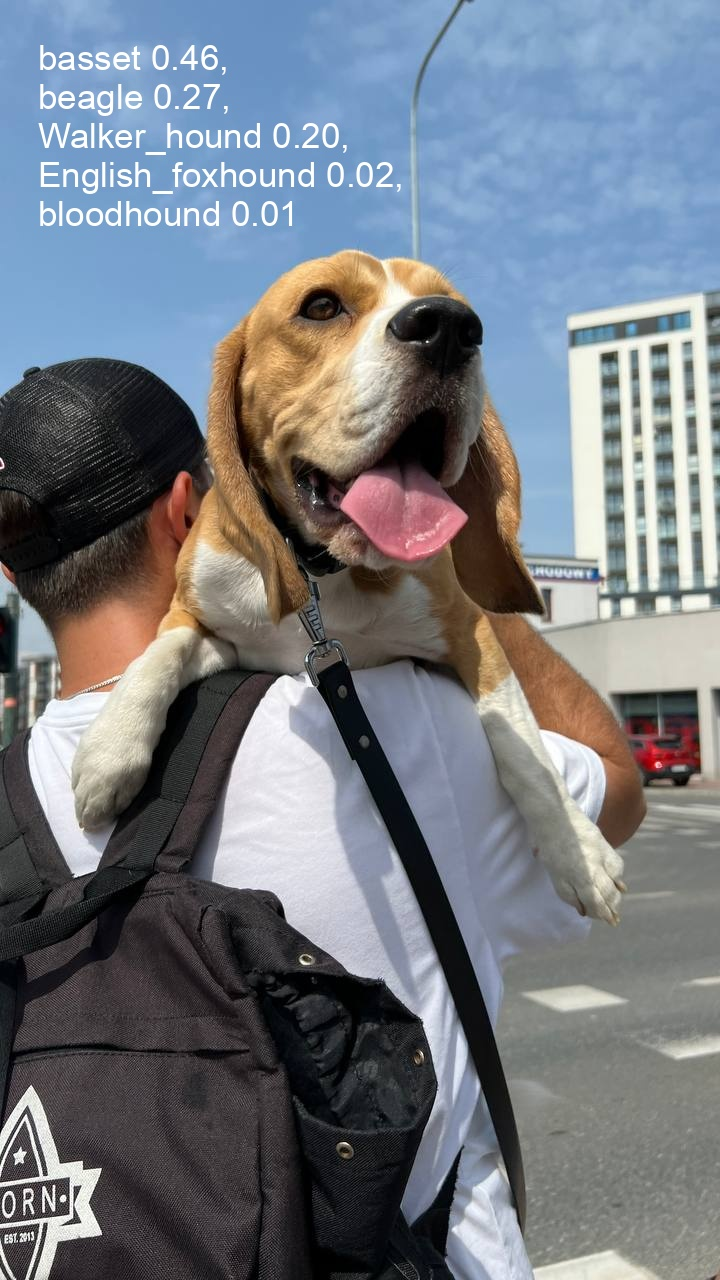

In [ ]:
%cd {HOME}
Image(filename='runs/classify/predict/dog.jpeg', height=600)

# Executando treinamento com o YOLO

## Executando treinamento com Python e apenas uma época

In [ ]:
%cd {HOME}

# Load a model
model = YOLO("yolov8n-cls.pt")  # load a pretained model

# Use the model
results = model.train(data=dataset.location, epochs=1, imgsz=64)  # train the model

New https://pypi.org/project/ultralytics/8.0.200 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/datasets/New-Animals-Classification-1, epochs=1, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=

/content


Overriding model.yaml nc=1000 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralyti

## Executando treinamento de modelo com CLI e 1 época

In [ ]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8n-cls.pt data={dataset.location} epochs=1

/content
New https://pypi.org/project/ultralytics/8.0.200 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/datasets/New-Animals-Classification-1, epochs=1, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, 

## Executando treinamento com 50 épocas

In [ ]:
#pip install --upgrade ultralytics==8.0.186 wandb

In [ ]:
%cd {HOME}

import wandb
from wandb.integration.ultralytics import add_wandb_callback as add_wandb_callbacks

# Load a model
model = YOLO("yolov8m-cls.pt")  # load a pretained model
add_wandb_callbacks(model)

# Use the model
results = model.train(data=dataset.location, epochs=50, imgsz=64)  # train the model

/content


100%|██████████| 32.7M/32.7M [00:00<00:00, 218MB/s]
New https://pypi.org/project/ultralytics/8.0.200 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/datasets/New-Animals-Classification-1, epochs=50, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_strid

In [ ]:
wandb.finish()

lr/pg0,▃▅▇████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▅▇████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▅▇████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/accuracy_top1,▂▁▆▇▆▇▆▃▆▅▅▃▅▇▆▇▆▇██▇▇▆▆▅▆▇▇█▇█▆▅▆▆▆▅▆▆█
metrics/accuracy_top5,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/loss,█▆▄▃▂▃▃▃▂▂▂▂▂▂▁▂▁▂▁▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/loss,█▆▂▃▄▂▃▅▄▄▄▄▃▂▃▃▃▂▁▁▂▂▂▂▃▂▁▁▂▂▁▁▂▂▂▃▂▂▂▂
lr/pg0,4e-05


## Plot Metrics

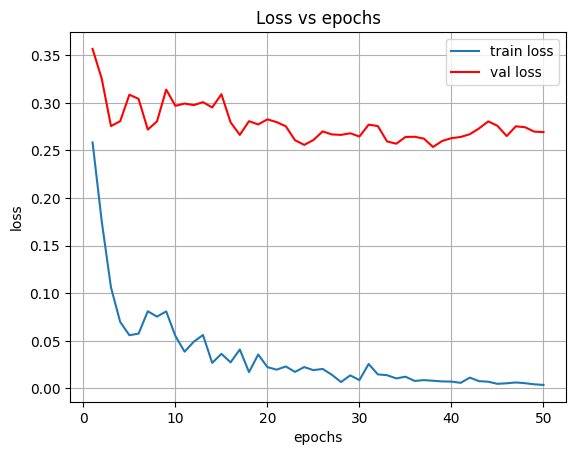

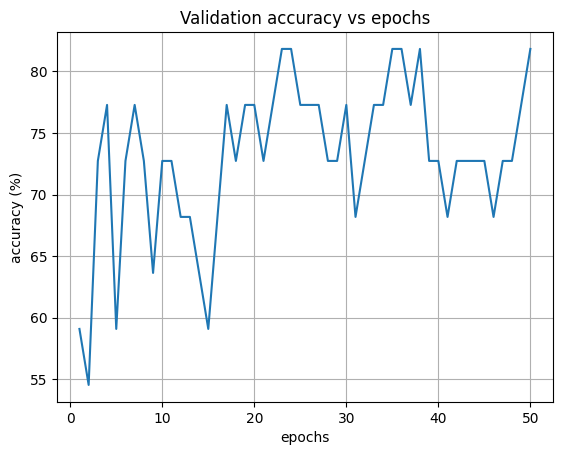

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt


results_path = './runs/classify/train3/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

## Verificando resultados

In [ ]:
!ls -la {HOME}/runs/classify/train3/

total 856
drwxr-xr-x 3 root root   4096 Oct 19 19:05 .
drwxr-xr-x 6 root root   4096 Oct 19 18:59 ..
-rw-r--r-- 1 root root   1433 Oct 19 18:59 args.yaml
-rw-r--r-- 1 root root 113473 Oct 19 19:04 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 101392 Oct 19 19:04 confusion_matrix.png
-rw-r--r-- 1 root root 285155 Oct 19 19:05 events.out.tfevents.1697741973.e8f8743b1c96.303.1
-rw-r--r-- 1 root root   9792 Oct 19 19:04 results.csv
-rw-r--r-- 1 root root 147010 Oct 19 19:05 results.png
-rw-r--r-- 1 root root  23800 Oct 19 18:59 train_batch0.jpg
-rw-r--r-- 1 root root  23358 Oct 19 19:03 train_batch1200.jpg
-rw-r--r-- 1 root root  24001 Oct 19 19:03 train_batch1201.jpg
-rw-r--r-- 1 root root  24223 Oct 19 19:03 train_batch1202.jpg
-rw-r--r-- 1 root root  23666 Oct 19 18:59 train_batch1.jpg
-rw-r--r-- 1 root root  23938 Oct 19 18:59 train_batch2.jpg
-rw-r--r-- 1 root root  24148 Oct 19 19:04 val_batch0_labels.jpg
-rw-r--r-- 1 root root  24230 Oct 19 19:04 val_batch0_pred.jpg
drwxr-x

In [ ]:
!cat {HOME}/runs/classify/train3/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                0.25847,                0.59091,                      1,                0.35669,             0.00020706,             0.00020706,             0.00020706
                      2,                0.17519,                0.54545,                      1,                 0.3252,             0.00041292,             0.00041292,             0.00041292
                      3,                0.10609,                0.72727,                      1,                0.27563,              0.0006103,              0.0006103,              0.0006103
                      4,                0.06988,                0.77273,                      1,                0.28076,             0.00067159,             0.00067159,             0.00067159
                      5,                

In [ ]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train3/weights/best.pt conf=0.25 source={dataset.location}/test/elephant
!yolo task=classify mode=predict model={HOME}/runs/classify/train3/weights/best.pt conf=0.25 source={dataset.location}/test/hippopotamus
!yolo task=classify mode=predict model={HOME}/runs/classify/train3/weights/best.pt conf=0.25 source={dataset.location}/test/rhinoceros

/content
Ultralytics YOLOv8.0.186 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15766499 parameters, 0 gradients

image 1/8 /content/datasets/New-Animals-Classification-1/test/elephant/02_elephant_day_gallery_jpg.rf.71f74c51fcf37cdb78326e91b5fa9b3b.jpg: 64x64 elephant 0.98, rhinoceros 0.02, hippopotamus 0.00, 6.3ms
image 2/8 /content/datasets/New-Animals-Classification-1/test/elephant/10c8g6tmh0_HI_115047_jpg.rf.1d513a3c21f171ce69306b99c12025e0.jpg: 64x64 elephant 0.98, rhinoceros 0.01, hippopotamus 0.01, 6.4ms
image 3/8 /content/datasets/New-Animals-Classification-1/test/elephant/6dueoes78_savanna_07182012_XL_287319_jpg.rf.63228411913801ab19ee5efb033043db.jpg: 64x64 elephant 0.52, rhinoceros 0.48, hippopotamus 0.00, 5.2ms
image 4/8 /content/datasets/New-Animals-Classification-1/test/elephant/African-elephant-Kenya_jpg.rf.3745da0c953f431f6c25bcc5f3e00857.jpg: 64x64 elephant 1.00, rhinoceros 0.00, hippopotamus 0.00, 5.1ms
image 5

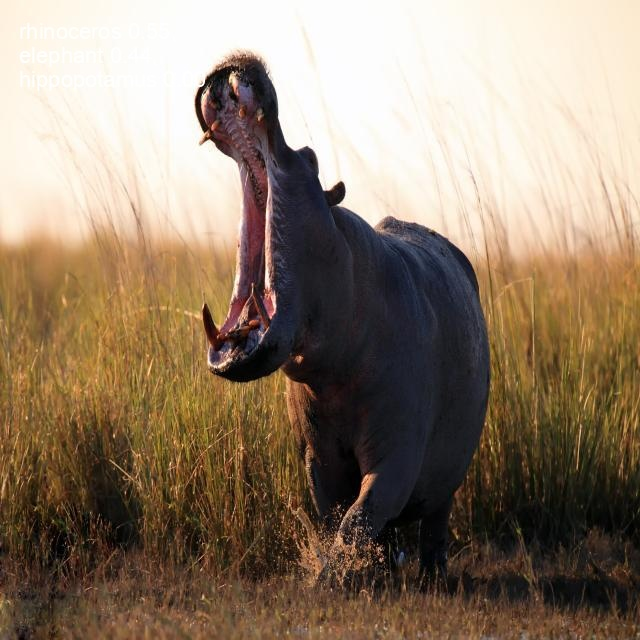

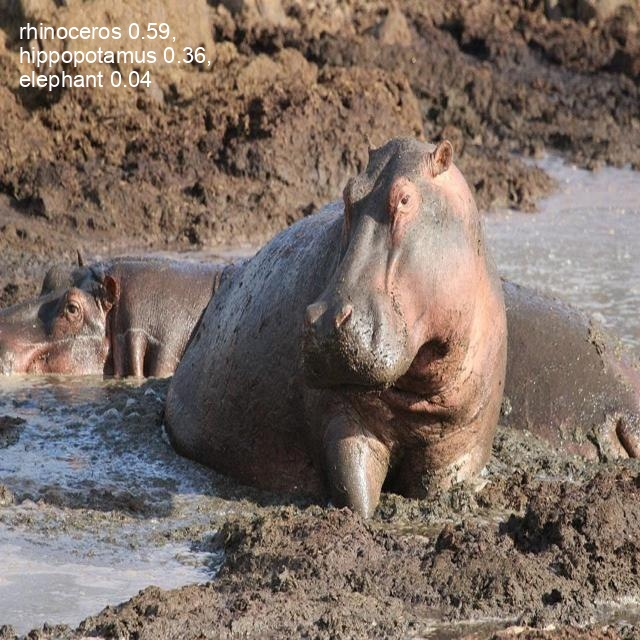

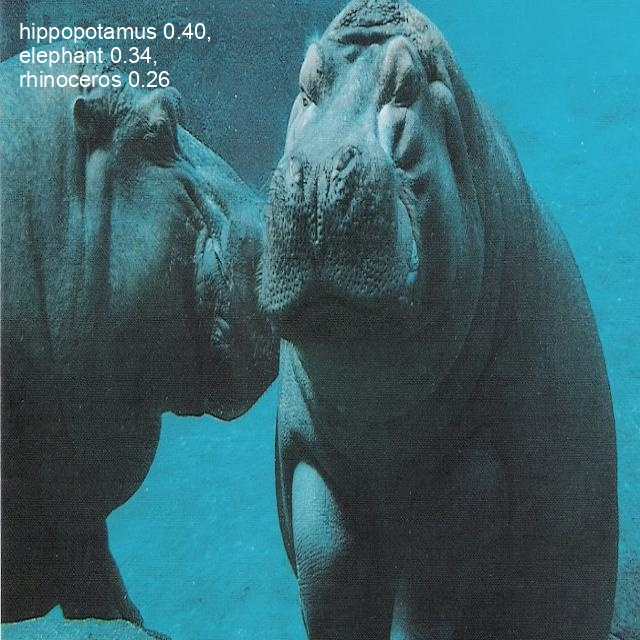

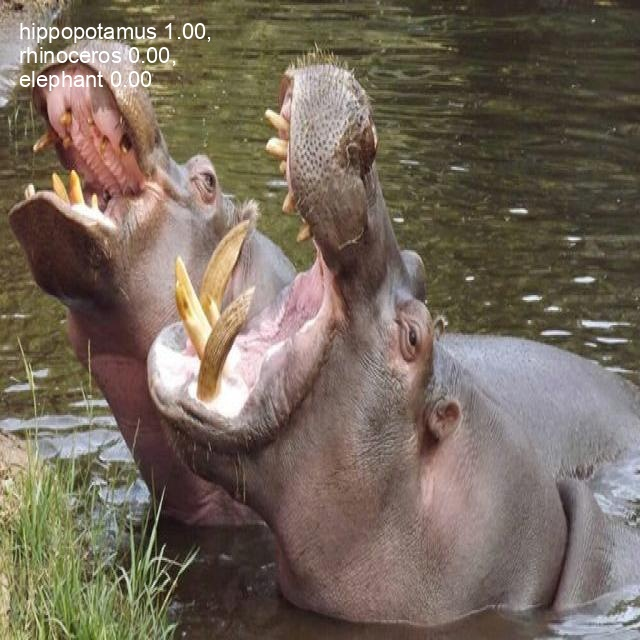

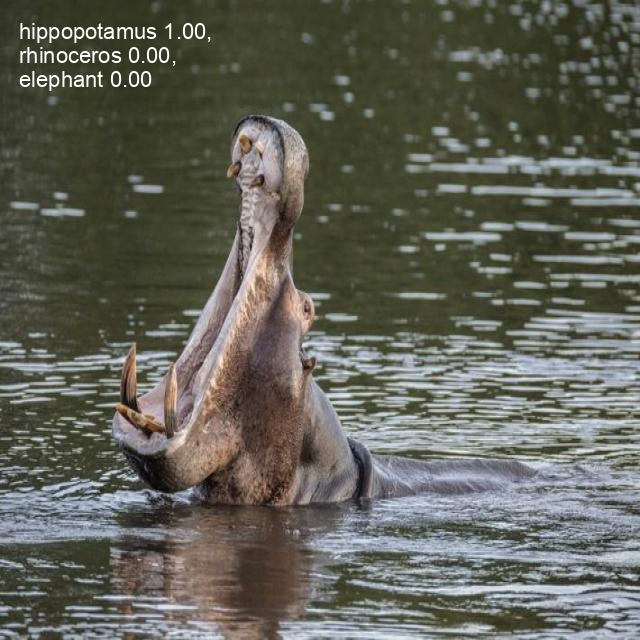

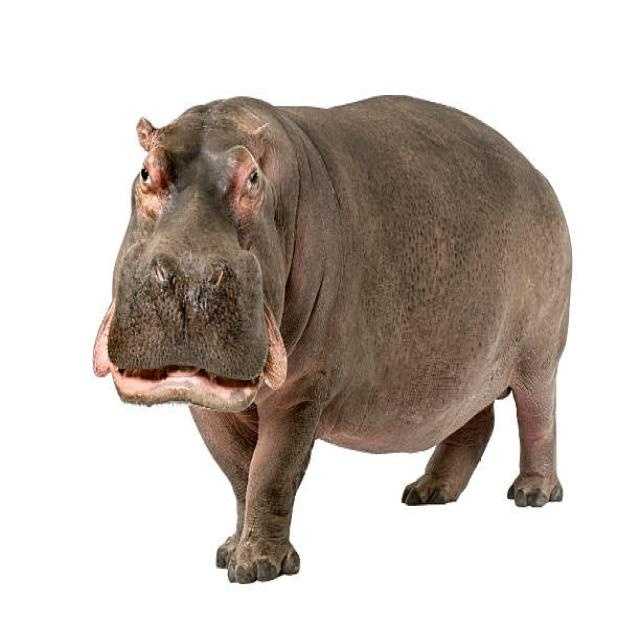

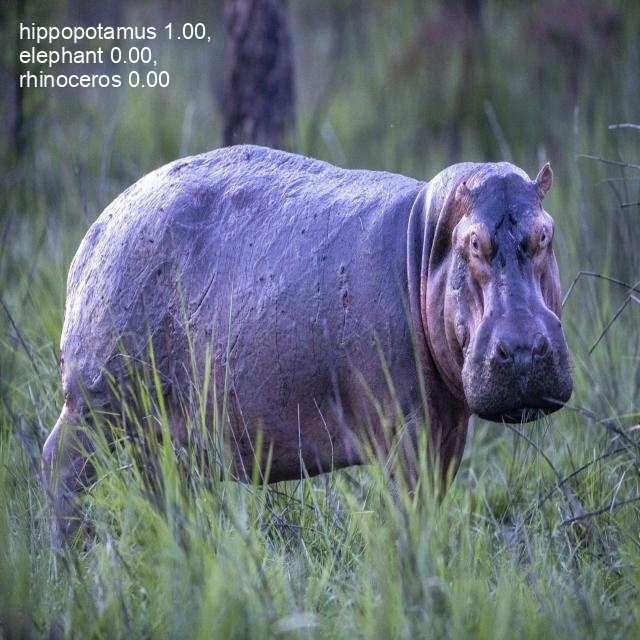

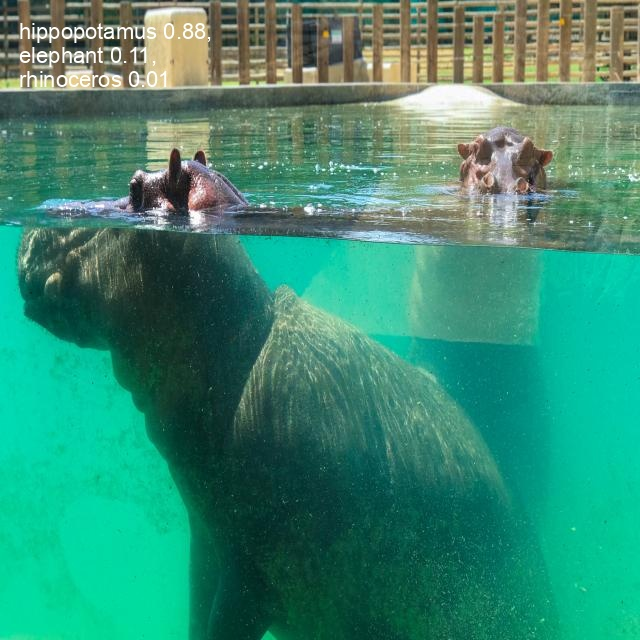

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/classify/predict3/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

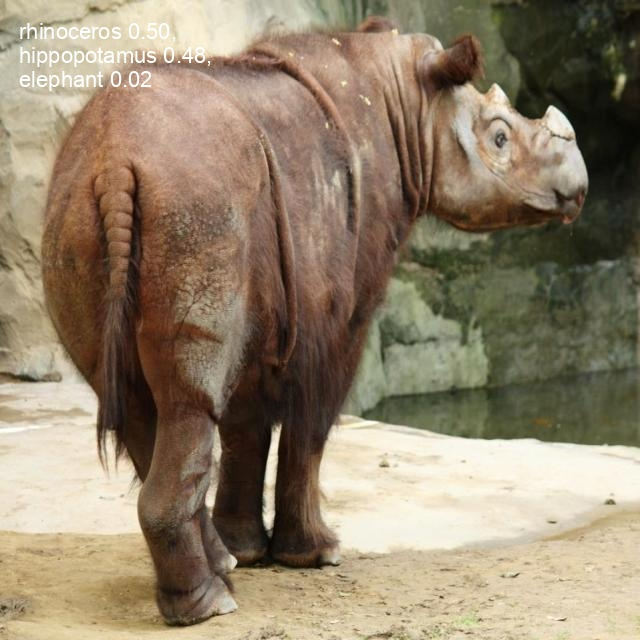

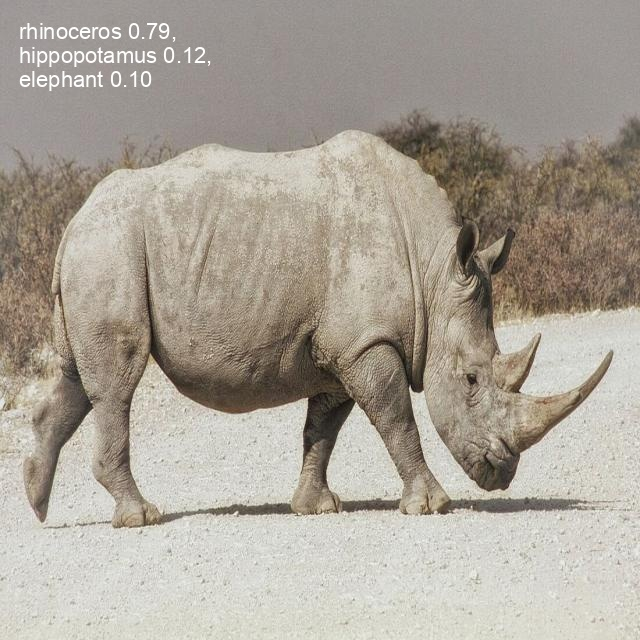

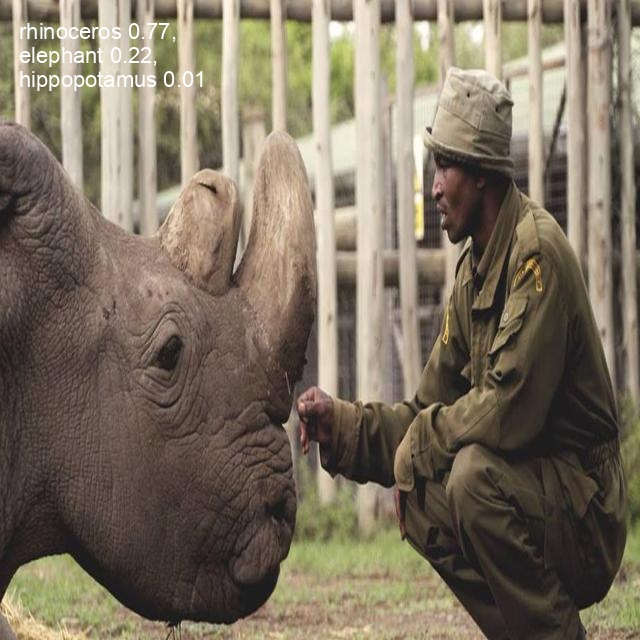

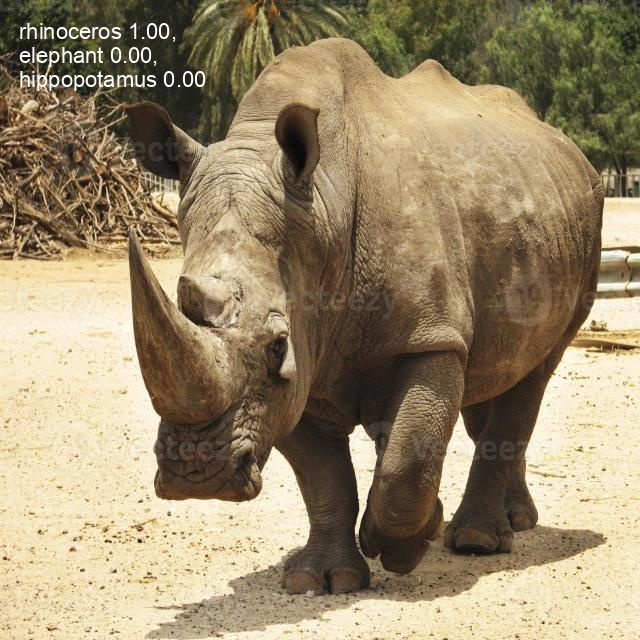

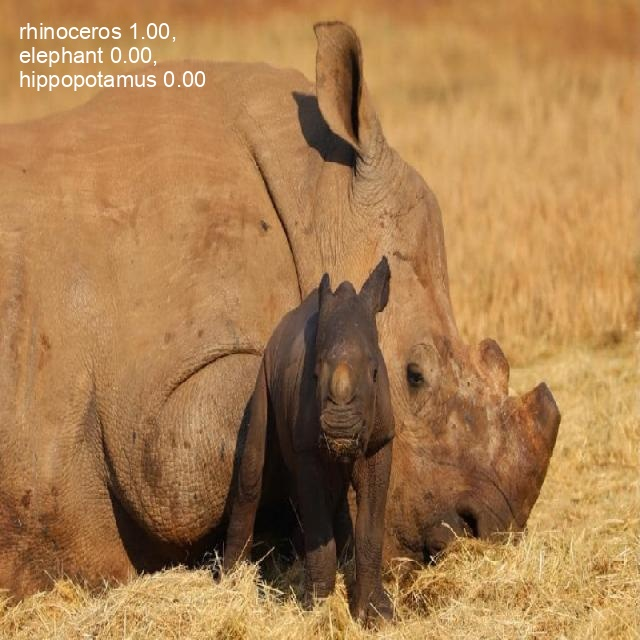

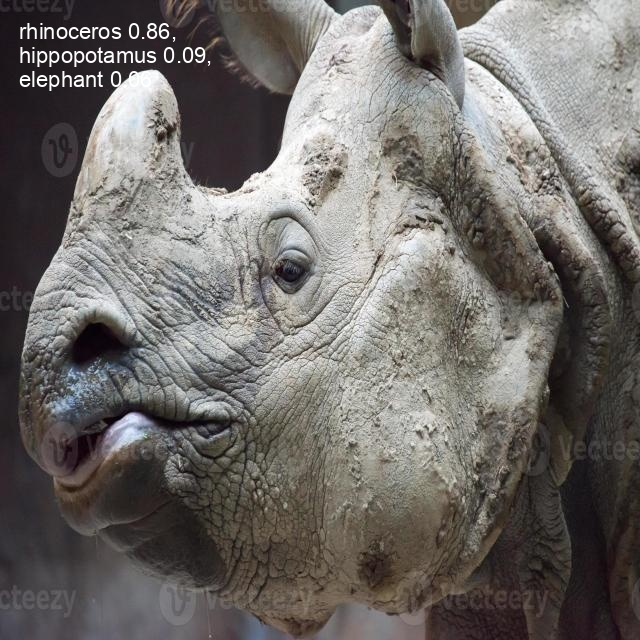

In [ ]:
for image_path in glob.glob(f'{HOME}/runs/classify/predict4/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
for image_path in glob.glob(f'{HOME}/runs/classify/predict5/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

# Salva resultados no Google Drive

In [ ]:
!scp -r /content/datasets/runs/classify '/content/gdrive/My Drive/Colab Notebooks/CESAR/rna-deep-learning/Projeto-Classificação'

cp: cannot stat '/content/datasets/runs/classify': No such file or directory


# Referências

*   https://github.com/computervisioneng/image-classification-yolov8/tree/main
*   https://wandb.ai/mukilan/wildlife-yolov8/reports/A-Gentle-Introduction-to-YOLOv8--Vmlldzo0MDU5NDA2
*   https://docs.wandb.ai/guides/integrations/ultralytics

